# 1. 1. 1 벡터와 행렬

In [1]:
import numpy as np

x = np.array([1, 2, 3])

print(x. __class__)

print(x.shape)

print(x.ndim)

W = np.array([[1,2,3],[4,5,6]])
print(W.shape)
print(W.ndim)

<class 'numpy.ndarray'>
(3,)
1
(2, 3)
2


# 1. 1. 2 행렬의 원소별 연산

In [2]:
W = np.array([[1,2,3],[4,5,6]])
X = np.array([[0, 1, 2],[3, 4, 5]])

print(W + X)
print(W*X) # 아다마르 곱

[[ 1  3  5]
 [ 7  9 11]]
[[ 0  2  6]
 [12 20 30]]


# 1. 1. 3 브로드캐스트

In [3]:
A = np.array([[1,2], [3,4]])
print(A * 10)

[[10 20]
 [30 40]]


In [4]:
A = np.array([[1,2], [3,4]])
b = np.array([10, 20])
print(A*b) # 차원이 달라도 차원을 확장하고 계산을 해줌 -> 브로드

[[10 40]
 [30 80]]


# 1. 1. 4 벡터의 내적과 행렬의 

In [5]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
print(np.dot(a,b))

A = np.array([[1,2], [3,4]])
B = np.array([[5,6], [7,8]])

print(np.matmul(A,B))

32
[[19 22]
 [43 50]]


# 1. 2. 1 신경망 추론 전체 그림

In [6]:
import numpy as np

W1 = np.random.randn(2,4)
b1 = np.random.randn(4)
x = np.random.randn(10,2)
h = np.matmul(x, W1) + b1
print(h)

[[ 0.73236592 -0.93757072  0.26084813 -1.34738715]
 [ 1.34789298 -0.41774258  0.66734846 -0.36588265]
 [ 0.24877784 -1.2922557  -0.06141063 -2.08348545]
 [ 0.13931146 -1.44027423 -0.13071124 -2.29426609]
 [ 1.09714273 -0.65390262  0.50306393 -0.78162662]
 [ 1.16288079 -0.58893428  0.54596916 -0.67064107]
 [ 1.72254117 -0.19647271  0.91989195  0.16950495]
 [ 1.06385012 -0.68563812  0.48127202 -0.83707354]
 [ 0.98694044 -0.81840262  0.43413126 -1.0039202 ]
 [ 2.12690873  0.19714288  1.1841343   0.84827584]]


In [7]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [8]:
a = sigmoid(h)
print(a)

[[0.67532424 0.28139131 0.56484477 0.20629787]
 [0.79378494 0.39705706 0.66090918 0.40953629]
 [0.56187566 0.21547125 0.48465217 0.11071234]
 [0.53477165 0.19150289 0.46736864 0.09159896]
 [0.74972436 0.34211063 0.6231791  0.31396942]
 [0.76185577 0.35687942 0.6331999  0.33835331]
 [0.84845587 0.45103922 0.71502009 0.54227507]
 [0.74342562 0.3350041  0.6180482  0.30215149]
 [0.72848318 0.30610284 0.60685974 0.26817136]
 [0.89349119 0.54912671 0.76569035 0.70020533]]


In [9]:
import numpy as np

x = np.random.randn(10,2)
W1 = np.random.randn(2,4)
b1 = np.random.randn(4)
W2 = np.random.randn(4,3)
b2 = np.random.randn(3)

h = np.matmul(x, W1) + b1
a = sigmoid(h)
s = np.matmul(a, W2) + b2
print(s)

[[ 0.98665137 -2.07995881 -1.80834943]
 [ 0.98685723 -2.08828785 -1.73973039]
 [ 1.00482259 -2.11922264 -1.55067933]
 [ 0.9905556  -2.1610669  -1.26429734]
 [ 0.81401282 -2.14943023 -0.78444784]
 [ 1.00724395 -2.18251792 -1.15198145]
 [ 0.96608056 -2.09832619 -1.63033495]
 [ 0.94457648 -2.2051707  -0.75533595]
 [ 0.96847493 -2.10704488 -1.57577627]
 [ 1.00946765 -2.07808106 -1.88845176]]


# 1. 2. 2 계층으로 클래스화 및 순전파 구현

In [10]:
import numpy as np

class Sigmoid:
    def __init__(self):
        self.params = []

    def forward (self, x):
        return 1/(1 + np.exp(-x))

In [11]:
class Affine:
    def __init__(self, W, b):
        self.params = [W,b]

    def forward(self,x):
        W, b = self.params
        out = np.matmul(x,W) + b
        return out

In [12]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size


        W1 = np.random.randn(I,H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H,O)
        b2 = np.random.randn(O)

        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)

        ]


        self.params = []
        for layer in self.layers:
            self.params += layer.params

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

In [13]:
a = ['A', 'B']

a +=['C', 'D']

print(a) 

['A', 'B', 'C', 'D']


In [14]:
x = np.random.randn(10,2)
model = TwoLayerNet(2, 4, 3)
s = model.predict(x)

# 1. 3. 4 계산 그래프

In [15]:
import numpy as np
D, N = 8, 7
x = np.random.randn(1, D)
y = np.repeat(x, N, axis = 0)
dy = np.random.randn(N, D)
dx = np.sum(dy, axis = 0, keepdims = True)


In [16]:
import numpy as np
D, N = 8, 7
x = np.random.randn(N, D)
y = np.sum(x, axis = 0, keepdims = True)

dy = np.random.randn(1,D)
dx = np.repeat(dy, N, axis = 0)

In [17]:
class MatMul:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None

    def forward(self, x):
        W, = self.params
        out = np.matmul(x, W)
        self.x = x
        return out

    def backward(self, dout):
        W, = self.params
        dx = np.matmul(dout,W.T)
        dW = np.matmul(self.x.T, dout)
        self.grads[0][...] = dW
        return dx

# 1. 3. 5 기울기 도출과 역전파 구현

In [18]:
class Sigmoid:
    def __init__(self):
        self.params, self.grads = [], []
        self.oout = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out

    def backwward(self, dout):
        dx = dout * (1.0 - self.dout) * self.out
        return dx


In [19]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None

    def forward(self, x):
        W, b = self.params
        out = np.matmul(x, W) + b
        self.x = x
        return out

    def backward(self, dout):
        W, b = self.params
        dx = np.matmul(dout, W.T)
        dW = np.matmul(self.x.T, dout)
        db = np.sum(dout, axis = 0)

        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx

# 1. 3. 6 가중치 갱신

In [20]:
class SGD:
    def __init__(self, lr = 0.01):
        self.lr = lr

    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr *grads[i]

# 1. 4. 1 스파이럴 데이터

In [21]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
%cd /content/drive/MyDrive/Colab Notebooks

from dataset import spiral

/content/drive/MyDrive/Colab Notebooks


x (300, 2)
t (300, 3)


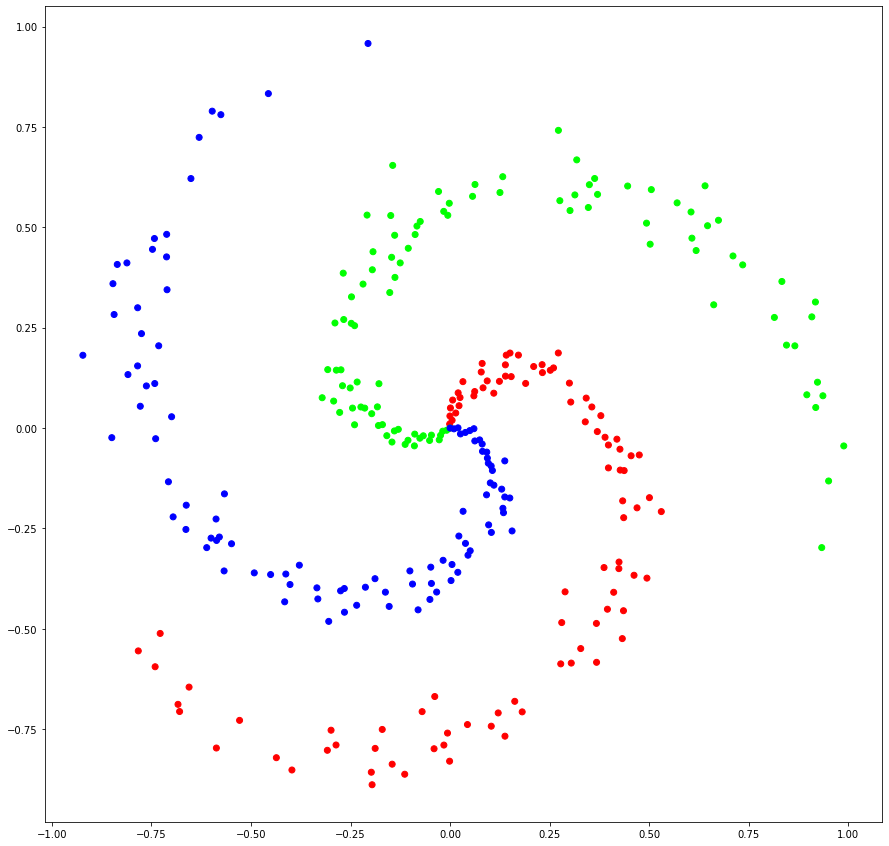

In [23]:
import matplotlib.pyplot as plt


x, t = spiral.load_data()
print('x', x.shape)
print('t', t.shape)

plt.figure(figsize = (15, 15))
plt.scatter(x[:,0], x[:,1], c = t)

In [24]:
import numpy as np
from common.layers import Affine, Sigmoid, SoftmaxWithLoss

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size

        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)


        self.layers = [
        Affine(W1, b1),
        Sigmoid(),
        Affine(W2, b2)
        ]

        self.loss_layer = SoftmaxWithLoss()
        self.params, self.grads = [], []

        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss

    def backward(self, dout = 1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

In [25]:
import numpy as np
from common.layers import Affine, Sigmoid, SoftmaxWithLoss

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size

        # 가중치와 편향 초기화
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)

        # 계층 생성
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        self.loss_layer = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모은다.
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss

    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout


| 에폭 1 | 반복 10 / 10 | 손실 1.13
| 에폭 2 | 반복 10 / 10 | 손실 1.13
| 에폭 3 | 반복 10 / 10 | 손실 1.12
| 에폭 4 | 반복 10 / 10 | 손실 1.12
| 에폭 5 | 반복 10 / 10 | 손실 1.11
| 에폭 6 | 반복 10 / 10 | 손실 1.14
| 에폭 7 | 반복 10 / 10 | 손실 1.16
| 에폭 8 | 반복 10 / 10 | 손실 1.11
| 에폭 9 | 반복 10 / 10 | 손실 1.12
| 에폭 10 | 반복 10 / 10 | 손실 1.13
| 에폭 11 | 반복 10 / 10 | 손실 1.12
| 에폭 12 | 반복 10 / 10 | 손실 1.11
| 에폭 13 | 반복 10 / 10 | 손실 1.09
| 에폭 14 | 반복 10 / 10 | 손실 1.08
| 에폭 15 | 반복 10 / 10 | 손실 1.04
| 에폭 16 | 반복 10 / 10 | 손실 1.03
| 에폭 17 | 반복 10 / 10 | 손실 0.96
| 에폭 18 | 반복 10 / 10 | 손실 0.92
| 에폭 19 | 반복 10 / 10 | 손실 0.92
| 에폭 20 | 반복 10 / 10 | 손실 0.87
| 에폭 21 | 반복 10 / 10 | 손실 0.85
| 에폭 22 | 반복 10 / 10 | 손실 0.82
| 에폭 23 | 반복 10 / 10 | 손실 0.79
| 에폭 24 | 반복 10 / 10 | 손실 0.78
| 에폭 25 | 반복 10 / 10 | 손실 0.82
| 에폭 26 | 반복 10 / 10 | 손실 0.78
| 에폭 27 | 반복 10 / 10 | 손실 0.76
| 에폭 28 | 반복 10 / 10 | 손실 0.76
| 에폭 29 | 반복 10 / 10 | 손실 0.78
| 에폭 30 | 반복 10 / 10 | 손실 0.75
| 에폭 31 | 반복 10 / 10 | 손실 0.78
| 에폭 32 | 반복 10 / 10 | 손실 0.77
| 에폭 33 | 반복 10 /

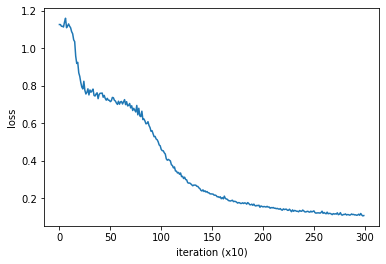

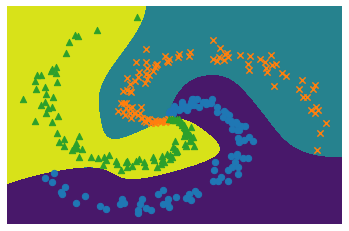

In [30]:
import numpy as numpy
from common.optimizer import SGD
from dataset import spiral
import matplotlib.pyplot as plt


max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size = 2, hidden_size = hidden_size, output_size = 3)
optimizer = SGD(lr = learning_rate)

data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):

    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]

    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]

        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)

        total_loss += loss
        loss_count += 1

        if (iters+1) % 10 ==0:
            avg_loss = total_loss / loss_count
            print('| 에폭 %d | 반복 %d / %d | 손실 %.2f' % (epoch+1, iters +1, max_iters, avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0


plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('iteration (x10)')
plt.ylabel('loss')
plt.show()


h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')


x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()


| 에폭 1 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 2 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 3 |  반복 1 / 10 | 시간 0[s] | 손실 1.13
| 에폭 4 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 5 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 6 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 7 |  반복 1 / 10 | 시간 0[s] | 손실 1.14
| 에폭 8 |  반복 1 / 10 | 시간 0[s] | 손실 1.16
| 에폭 9 |  반복 1 / 10 | 시간 0[s] | 손실 1.11
| 에폭 10 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 11 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 12 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 13 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 14 |  반복 1 / 10 | 시간 0[s] | 손실 1.09
| 에폭 15 |  반복 1 / 10 | 시간 0[s] | 손실 1.08
| 에폭 16 |  반복 1 / 10 | 시간 0[s] | 손실 1.04
| 에폭 17 |  반복 1 / 10 | 시간 0[s] | 손실 1.03
| 에폭 18 |  반복 1 / 10 | 시간 0[s] | 손실 0.94
| 에폭 19 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 20 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 21 |  반복 1 / 10 | 시간 0[s] | 손실 0.87
| 에폭 22 |  반복 1 / 10 | 시간 0[s] | 손실 0.85
| 에폭 23 |  반복 1 / 10 | 시간 0[s] | 손실 0.80
| 에폭 24 |  반복 1 / 10 | 시간 0[s] | 손실 0.79
| 에폭 25 |  반복 1 / 10 | 시간

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_te

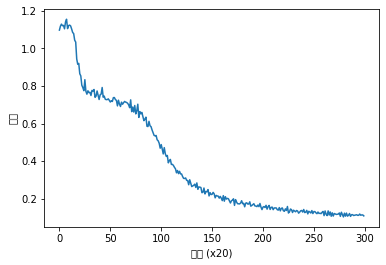

In [31]:
from common.optimizer import SGD
from common.trainer import Trainer
from dataset import spiral

max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size = 2, hidden_size = hidden_size, output_size = 3)
optimizer = SGD(lr = learning_rate)

trainer = Trainer(model, optimizer)
trainer.fit(x, t, max_epoch, batch_size, eval_interval = 20)
trainer.plot()